In [11]:
pip install jupyterlab

In [12]:
pip install notebook

In [14]:
pip install --upgrade jupyter_http_over_ws>=0.0.7 && \
  jupyter serverextension enable --py jupyter_http_over_ws

Enabling: jupyter_http_over_ws
- Writing config: /root/.jupyter
    - Validating...
      jupyter_http_over_ws  OK


In [16]:
jupyter notebook\
  --NotebookApp.allow_origin='https://colab.research.google.com'
  --port=8888
  --NotebookApp.port_retries=0

SyntaxError: ignored

In [2]:
import numpy as np
import pandas as pd
from tqdm import tqdm

In [26]:
pip install scikit-learn-extra

In [3]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn_extra.cluster import KMedoids
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (13, 8)
import seaborn as sns

In [4]:
from google.colab import files
uploaded = files.upload()

Saving data_final.csv to data_final (2).csv


In [5]:
df = pd.read_csv("data_final.csv")

In [6]:
df[df.isnull().any(axis=1)]

,stu_id,credit,sequence,time_a1,time_b1,time_b2,time_b3,time_b4,time_start,time_total,time_answer,time_start_ratio,time_answer_ratio


In [7]:
df = df[['stu_id','credit','time_answer_ratio','time_start_ratio']]
df.set_index('stu_id', inplace=True)
df

,credit,time_answer_ratio,time_start_ratio
stu_id,,,
ARE000018904852,0,0.000000,0.218137
ARE000018904861,0,0.000000,0.448630
ARE000018904843,0,0.000000,0.502530
ARE000018904832,0,0.000000,0.530864
ARE000040210135,0,0.000000,0.789097
...,...,...,...
USA000015004637,1,0.582812,0.309375
USA000007902358,1,0.600246,0.303813
USA000007902371,1,0.447581,0.159946


In [ ]:
df_1 = df[df['credit']==1]
df_0 = df[df['credit']==0]
display(df_1.head())
display(df_0.head())
print(len(df_1), len(df_0))

In [ ]:
df_2 = df_1[['time_answer_ratio','time_start_ratio']]
df_2

In [ ]:
df_3 = df_0[['time_answer_ratio','time_start_ratio']]
df_3

In [ ]:
x = df_2.to_numpy()
x = RobustScaler().fit_transform(x)
df_scale = pd.DataFrame(x, columns = df_2.columns, index = df_2.index)
df_scale

In [8]:
x = df.to_numpy()
x = RobustScaler().fit_transform(x)
df_scale_2 = pd.DataFrame(x, columns = df.columns, index = df.index)
df_scale_2

,credit,time_answer_ratio,time_start_ratio
stu_id,,,
ARE000018904852,0.0,0.000000,-0.636321
ARE000018904861,0.0,0.000000,0.308239
ARE000018904843,0.0,0.000000,0.529118
ARE000018904832,0.0,0.000000,0.645234
ARE000040210135,0.0,0.000000,1.703472
...,...,...,...
USA000015004637,1.0,1.203226,-0.262429
USA000007902358,1.0,1.239218,-0.285222
USA000007902371,1.0,0.924037,-0.874788


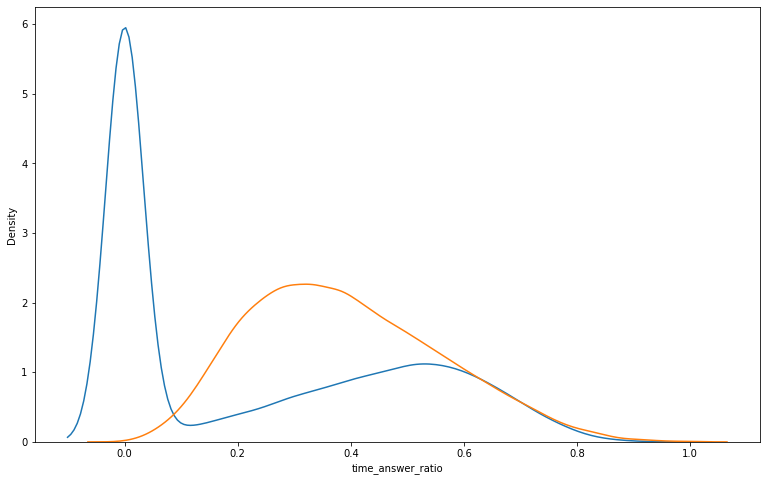

In [9]:
sns.kdeplot(df['time_answer_ratio'])
sns.kdeplot(df['time_start_ratio'])

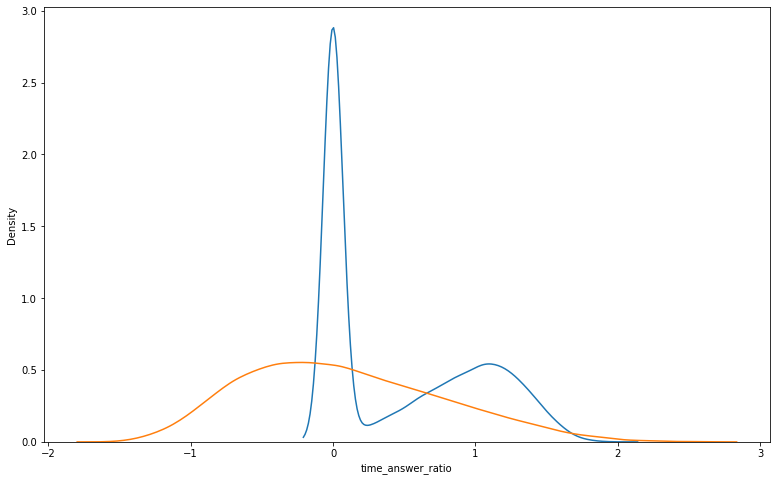

In [10]:
sns.kdeplot(df_scale_2['time_answer_ratio'])
sns.kdeplot(df_scale_2['time_start_ratio'])

In [ ]:
distortions = []
for i in range(1, 8):
    kmedoids = KMedoids(n_clusters=i, random_state=0).fit(x)
    #inertia가 군집 내의 분산을 의미
    distortions.append(kmedoids.inertia_)

# plot
plt.figure(figsize=(7,5))
plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal K')
plt.show()

In [ ]:
num = 6
kmedoids = KMedoids(n_clusters=num, random_state=0).fit(x)
print(kmedoids.labels_)

In [ ]:
df_scale['cluster'] = kmedoids.labels_
df_scale['credit'] = df['credit']
df_scale

# 두 변수 상관이 너무 높음

In [ ]:
sns.scatterplot(data=df_scale, x="time_start_ratio", y="time_answer_ratio", hue="cluster", style="credit")

In [ ]:
# 3차원 코드 참고
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
colors = ['r','b','g','purple','orange','gray']

for i, color in enumerate(colors):
    x = df_scale[df_scale['cluster'] == i]['time_answer_ratio']
    y = df_scale[df_scale['cluster'] == i]['time_start_ratio']
    z = df_scale[df_scale['cluster'] == i]['credit']
    ax.scatter(x,y,c=color,marker='o')

ax.set_xlabel('time_answer_ratio')
ax.set_ylabel('time_start_ratio')
ax.set_zlabel('credit')